<a href="https://colab.research.google.com/github/tapiwamesa/Multiclass-Alphabetical-Letter-Recognition/blob/main/Handwritten_Letters_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Accurate recognition of handwritten letters is a foundational task in the field of pattern recognition and machine learning, with broad applications in OCR (Optical Character Recognition), education technology and digital archiving. In this project, the primary challenge lies in effectively classifying handwritten English alphabets (A-Z) using machine learning models. Models employed are the benchmark Logistic Regression algorithm for multi classification and the Decison tree algorithm for classification. The focus of this project is to explore and evaluate machine learning models to achieve optimal accuracy and precision in letter recognition tasks.

# Objectives

1. To build a robust machine learning model for recognizing handwritten letters from A to Z.

2. To evaluate and compare the performance of different classification algorithms, particularly logistic regression and decision trees, in terms of accuracy, precision, recall, and F1-score.

3. To analyze misclassifications using a confusion matrix and understand patterns or trends in model performance across different letter classes.

4. To identify the model that generalizes best to unseen data by maximizing precision and recall while minimizing misclassifications.

5. To recommend an optimal model architecture that balances complexity with performance, based on the evaluation metrics.

# Exploratory Data Analysis

In [ ]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Mounting the drive

from google.colab import drive
#drive.mount('content/drive')

In [ ]:
# importing the data
data = pd.read_csv("/content/drive/MyDrive/Datasets/letter-recognition.csv")

In [ ]:
# viewing the data

data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
# Data quality

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
# Shape of the data
data.shape

(20000, 17)

In [ ]:
# Data descriptive stats

data.describe().T

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


In [ ]:
# dropping non numeric target column to view the correlations

data_corr = data.drop(columns = "letter", axis = 1).corr()

<function matplotlib.pyplot.show(close=None, block=None)>

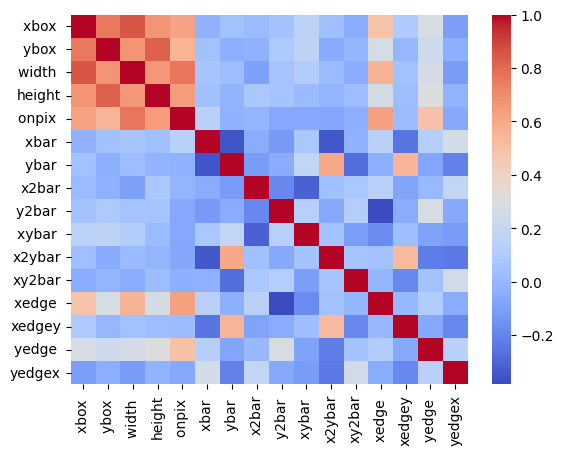

In [ ]:
# Correlation matrix

sns.heatmap(data_corr, cmap = "coolwarm")
plt.show

In [ ]:
#sns.pairplot(data.drop(columns = "letter", axis = 1))
#plt.show()

# Data Preprocessing

*Using ASCII to convert letter to number position on the alphabet*

*American Standard Code for Information Interchange*

*It’s a system that assigns a numeric code to each character, like letters, numbers, and symbols — so that computers can understand and store text.*

In [ ]:
# first letter is "A" hence position is 0
letter_to_num = {chr(i): i - 65 for i in range(65, 91)}

In [ ]:
# Viewing our dictionary
letter_to_num

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [ ]:
# Mapping the new dict into the data
data["letter_num"] = data["letter"].map(letter_to_num)

In [ ]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter_num
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,19
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,8
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,3
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,13
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,6


In [ ]:
# Checking if this is correct for 'A'

data[data["letter"] == 'A'].head() # this is true since it returns position 0 under column letter_num

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter_num
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7,0
78,A,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8,0
118,A,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7,0
130,A,2,1,4,2,1,8,1,2,2,7,2,8,2,5,2,7,0
134,A,3,7,5,5,3,10,4,1,2,8,3,9,2,4,2,7,0


In [ ]:
# Splitting the data

X = data.drop(columns = ["letter", "letter_num"], axis = 1)
y = data["letter_num"]

In [ ]:
# shapes of the split data
X.shape, y.shape

((20000, 16), (20000,))

In [ ]:
# Lets look at feature set

X.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


Since the target variable is made up of letters we need to encode the letter to be represented by numbers

In [ ]:
# Unique target classes
y.unique()

array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

# Model Training

In [ ]:
# importing machine learning dependencies

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# Splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [ ]:
# shapes of the train data
X_train.shape, y_train.shape

((14000, 16), (14000,))

In [ ]:
# importing dependencies for Data normalization

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
# data normalization

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Logistics Regression

In [ ]:
# instantiating the Logistics Regression

lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# calculating model confusion matrix

y_pred = lg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Calculating model metrics

lg_results = pd.DataFrame(columns = ["accuracy", "precision", "recall", "f1"])

p = precision_score(y_test, y_pred, average = "macro")
r = recall_score(y_test, y_pred, average = "macro")
f = f1_score(y_test, y_pred, average = "macro")
a = accuracy_score(y_test, y_pred)

lg_results.loc[len(lg_results)] = [a, p, r, f]

In [ ]:
# Logistics Regression results
lg_results

,accuracy,precision,recall,f1
0,0.771,0.770405,0.769649,0.769159


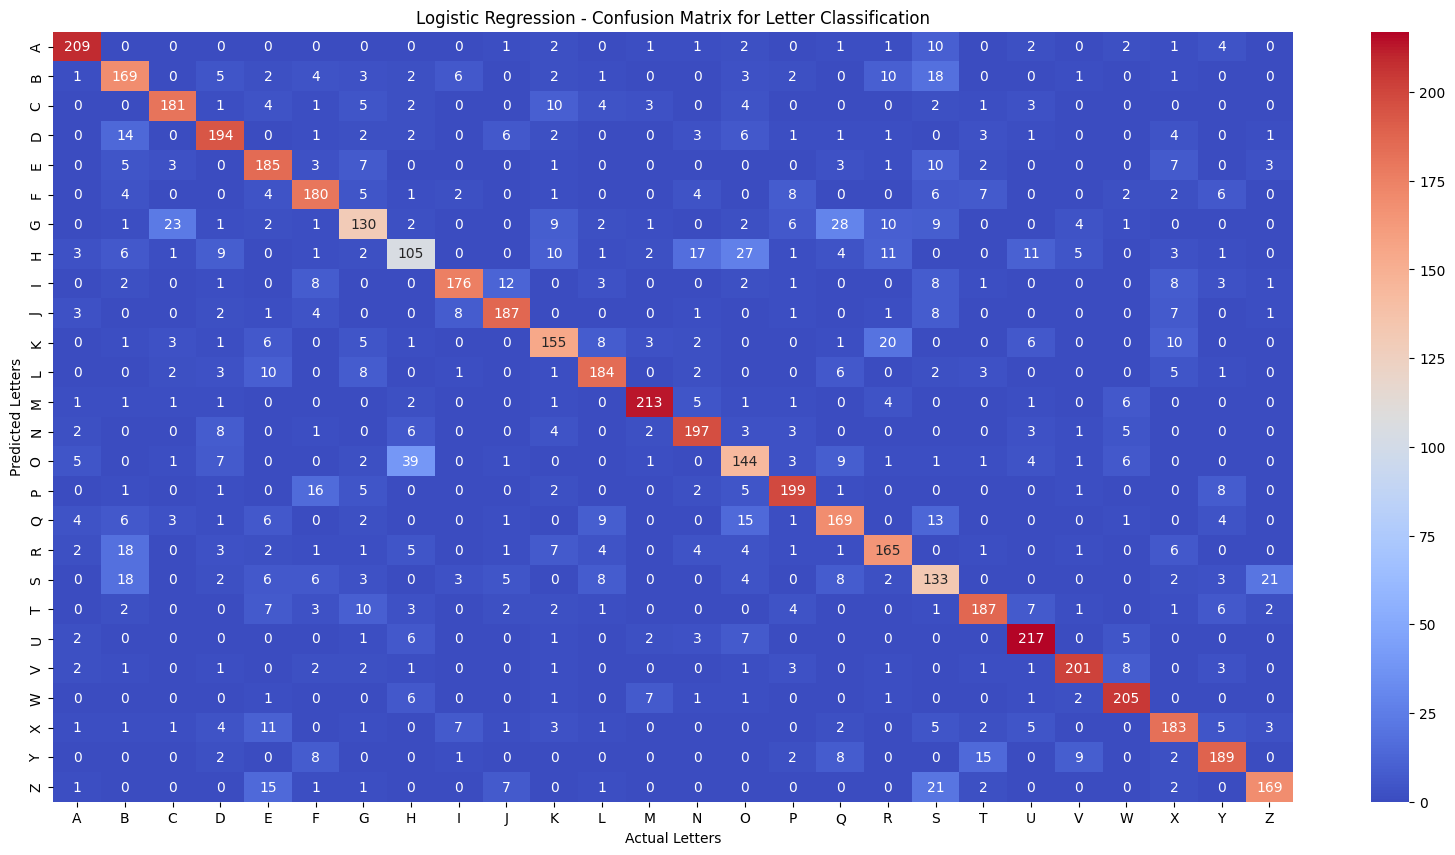

In [ ]:
# Plotting the confusion matrix

plt.figure(figsize = (20, 10))
sns.heatmap(cm, cmap = "coolwarm", annot = True, fmt = "d", xticklabels = letter_to_num.keys(), yticklabels = letter_to_num.keys())
plt.xlabel("Actual Letters")
plt.ylabel("Predicted Letters")
plt.title("Logistic Regression - Confusion Matrix for Letter Classification")
plt.show()

The confusion matrix above shows us how many of the letter were predicted correctly and how many were misclassified. The diagonal of the matrix shows the correctly classified letters, for example letter 209 A's were correctly classified. 3 Letters of symbol "H" were misclassified as letter "A".

The overall results show an accuracy of 77%, a precision of 77% and recall of 76%. This simply tells us that out of the classifications 77% of the letters were correctly classified in the unseen test data. Of the real letters from A - Z the model on overall found 76.9% of letters. The relationship between the precision and te recall is explained by the f1 score and is 76.9% for the logistic regression model.

### 2. Decision Trees

In [ ]:
# Instantiating the decision trees

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
# calculating model confusion matrix

y_pred = dt.predict(X_test_scaled)
cm_dt = confusion_matrix(y_test, y_pred)

# Calculating model metrics

dt_results = pd.DataFrame(columns = ["accuracy", "precision", "recall", "f1"])

p_d = precision_score(y_test, y_pred, average = "macro")
r_d = recall_score(y_test, y_pred, average = "macro")
f_d = f1_score(y_test, y_pred, average = "macro")
a_d = accuracy_score(y_test, y_pred)

dt_results.loc[len(dt_results)] = [a_d, p_d, r_d, f_d]

In [ ]:
# Decision Tree results
dt_results

,accuracy,precision,recall,f1
0,0.863833,0.864461,0.863763,0.863873


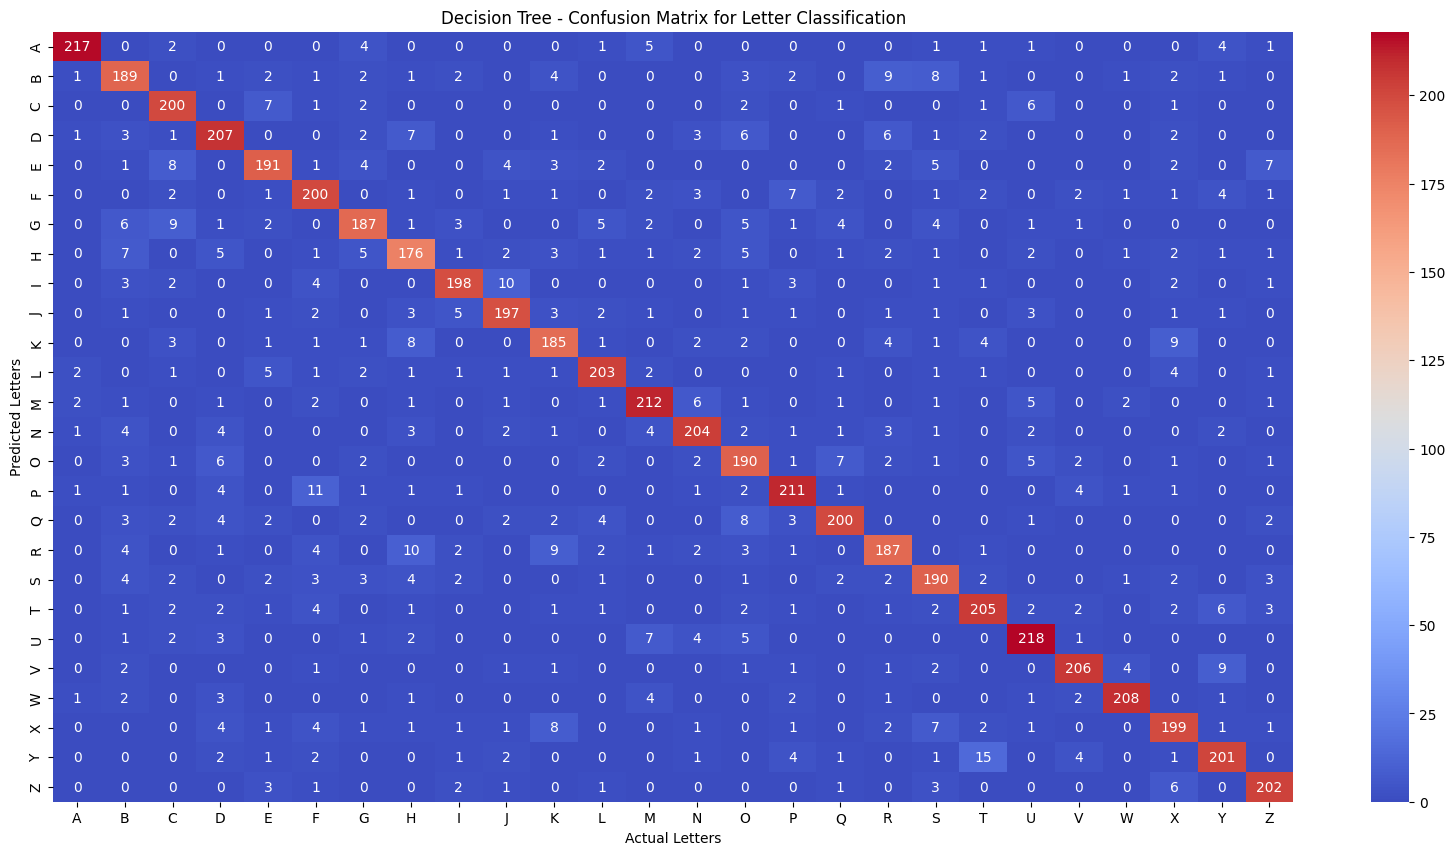

In [ ]:
# Plotting the confusion matrix for the Decision Tree

plt.figure(figsize = (20, 10))
sns.heatmap(cm_dt, cmap = "coolwarm", annot = True, fmt = "d", xticklabels = letter_to_num.keys(), yticklabels = letter_to_num.keys())
plt.xlabel("Actual Letters")
plt.ylabel("Predicted Letters")
plt.title("Decision Tree - Confusion Matrix for Letter Classification")
plt.show()

The decision tree model as better metrics comparred to the logistic regression model. The precision is at 86% with a recall of the same magnitude. This is evident when we look for examaple at class A for actual values vs the predicted values where 217 values of A were correctly classified compared to the logistic regression model were 209 were correclt classified as letter A.

Using the decision tree has improved the model performance from accurately classifying the training set with 77% to 86%. The precision score which looks at how much of the predictions in the unseen data were correctly classified, improved from 77% to 86%.

In this the decision tree is the optimal model that has better precision and accuracy in predicting the unseen data thus a better generalization.

# Conclusion

The letter recognition project successfully demonstrated the effectiveness of machine learning models in classifying handwritten letters from A to Z. The initial use of logistic regression provided a baseline performance with an accuracy of 77%, precision of 77%, and recall of 76%, highlighting its moderate capability in handling this classification task. However, a deeper analysis of the confusion matrix revealed several misclassifications, particularly among similar-looking letters, suggesting room for improvement.

The decision tree model significantly enhanced the classification performance, achieving an improved precision and recall of 86%. This improvement was evident across several letter classes, as shown by higher correctly classified counts in the confusion matrix—such as the increase from 209 to 217 correct predictions for letter A. The decision tree model demonstrated a better ability to generalize to unseen data, reducing misclassifications and boosting overall accuracy.

In conclusion, the decision tree outperformed logistic regression in both accuracy and reliability, making it the more suitable model for the letter recognition task. These results highlight the importance of model selection in machine learning and its impact on the effectiveness of classification systems.